In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline  

In [2]:
# import the dataset
clean_df = pd.read_csv("data/convert_columns_clean_data.csv")

# select needed columns.
features = [c for c in clean_df.columns if c not in ['salary','jobId']]

# Fit regression model
global_best_score = 0
global_best_mse=0
alpha_of_global_best_score = 0
thres_of_best_score = 0
threshold_list = [0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]
plot_df = pd.DataFrame()
plot_list_test=[]

for thres in threshold_list:
    
    # select needed features
    select_feature_model = VarianceThreshold(threshold = thres)
    selected_feature_df = pd.DataFrame(select_feature_model.fit_transform(clean_df[features]))
    
    # split data set into 70% train set, 20% validation set and 10% test set
    selected_feature_lable_df = pd.concat([selected_feature_df, clean_df["salary"]], axis = 1)
    train_data, validate_data, test_data = np.split(selected_feature_lable_df.sample(frac=1), [int(0.7 * len(selected_feature_lable_df)), int(0.9 * len(selected_feature_lable_df))])

    features_after_selection = list(selected_feature_df.columns)
    train_data_features = train_data[features_after_selection]
    train_data_labels = train_data['salary']

    validate_data_features = validate_data[features_after_selection]
    validate_data_labels = validate_data['salary']

    test_data_features = test_data[features_after_selection]
    test_data_labels = test_data['salary']
    
    print("Threshold: ", thres)

    local_best_score = 0
    alpha_of_local_best_score = 0
    best_model = None
    alphas_list=[0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]
    
    plot_list_train=[]
    for each_alpha in alphas_list:
        
        ridge = linear_model.Ridge(alpha = each_alpha)
        
        ridge.fit(train_data_features, train_data_labels) 
        
        #get R-squared score using validation data set
        result = ridge.predict(validate_data_features)

        r2_score_validate_set = r2_score(validate_data_labels,result)
        
        plot_list_train.append(r2_score_validate_set)
        
        # update best depth for current num_of_component
        if r2_score_validate_set > local_best_score:
            local_best_score = r2_score_validate_set
            best_model = ridge
            alpha_of_local_best_score = each_alpha
        
    # plot the r2 score of the validation set
    plot_each_df = pd.DataFrame({thres: plot_list_train}) 
    plot_df = pd.concat([plot_df, plot_each_df], axis = 1)
    
    # predict using test data set
    result = best_model.predict(test_data_features)
    r2_score_test_data = r2_score(test_data_labels, result)
    mean_squared_error_test_data = mean_squared_error(test_data_labels, result)

    print('mean squared error on test data set is: ', mean_squared_error_test_data)
    print("R2 score on test data set is: ",r2_score_test_data)   
    print("\n\n\n")
   
    plot_list_test.append(r2_score_test_data)    
    
    # update best alpha and best threshold of feature selection
    if r2_score_test_data > global_best_score:
        global_best_mse = mean_squared_error_test_data
        global_best_score = r2_score_test_data
        alpha_of_global_best_score = alpha_of_local_best_score
        thres_of_best_score = thres
        
print("Best r2 score on test data set is: ",global_best_score, "with alpha: ", alpha_of_global_best_score, " with threshold of feature selection: ", thres_of_best_score, "with mean square error: ", global_best_mse)
    

Threshold:  0
mean squared error on test data set is:  383.823407717
R2 score on test data set is:  0.743516986948




Threshold:  0.002
mean squared error on test data set is:  384.708551648
R2 score on test data set is:  0.742190224752




Threshold:  0.004
mean squared error on test data set is:  385.341639142
R2 score on test data set is:  0.742357107531




Threshold:  0.006
mean squared error on test data set is:  383.278557707
R2 score on test data set is:  0.743540825669




Threshold:  0.008
mean squared error on test data set is:  382.426056367
R2 score on test data set is:  0.744806198719




Threshold:  0.01
mean squared error on test data set is:  382.3301571
R2 score on test data set is:  0.743324349908




Threshold:  0.012
mean squared error on test data set is:  386.696329419
R2 score on test data set is:  0.743156762679




Threshold:  0.014
mean squared error on test data set is:  383.657105505
R2 score on test data set is:  0.746292401402




Threshold:  0.016
mean 

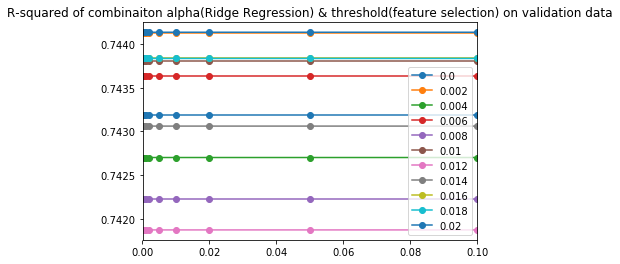

In [3]:
#visualize the results.
plot_df.index = alphas_list
plt = plot_df.plot(marker='o', title='R-squared of combinaiton alpha(Ridge Regression) & threshold(feature selection) on validation data')

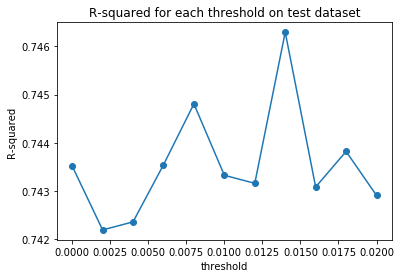

In [5]:
#visualize the result of test dataset
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(threshold_list, plot_list_test, marker='o') 
ax.set_xlabel('threshold')
ax.set_ylabel('R-squared')
ax.set_title('R-squared for each threshold on test dataset')